In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Real estate.csv')
dataframe.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### We will be dropping the transcation date and No columns

In [3]:
dataset = dataframe.iloc[:, 2:]
dataset.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


#### We will look at three factors that might promote the rise in the prices.
- house age
- distance to the neartest MRT station
- number of convenience stores

In [4]:
hypothesis = dataset.iloc[:, [0, 1, 2, -1]]
hypothesis.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


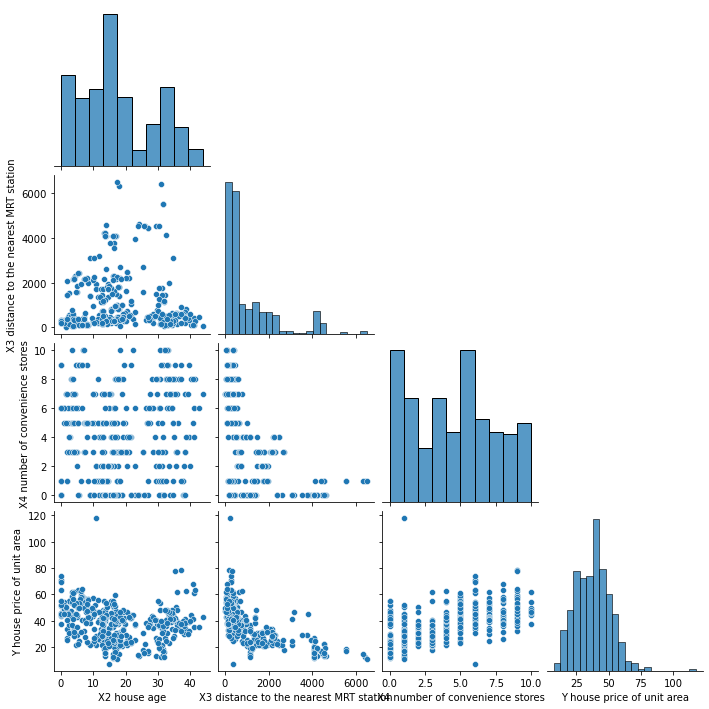

In [5]:
sns.pairplot(hypothesis, corner = True)

In [6]:
hypothesis_10 = hypothesis.sort_values('Y house price of unit area', ascending = False).reset_index().iloc[0:10, 1:]

In [7]:
hypothesis_10

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,10.8,252.58220,1,117.5
1,37.2,186.51010,9,78.3
2,35.4,318.52920,9,78.0
3,0.0,292.99780,6,73.6
4,0.0,292.99780,6,71.0
5,0.0,292.99780,6,70.1
6,0.0,292.99780,6,69.7
7,40.9,122.36190,8,67.7
8,6.5,90.45606,9,63.9
9,41.4,281.20500,8,63.3


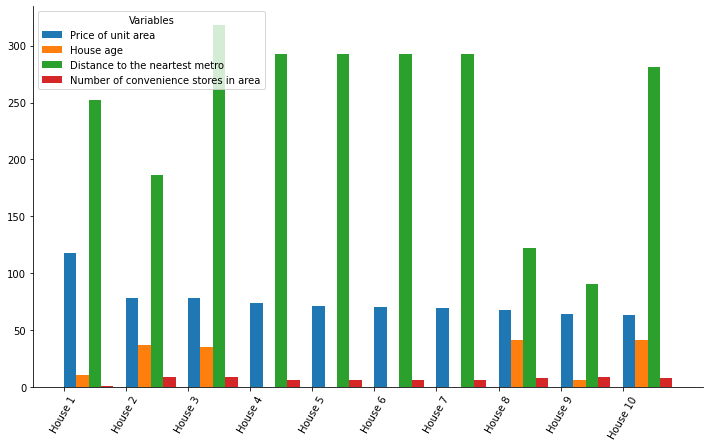

In [8]:
plt.figure(figsize =(12, 7))
width = 0.2
n = np.arange(10)

plt.bar(n , hypothesis_10['Y house price of unit area'], width, align = 'edge', label="Price of unit area")
plt.bar(n +width, hypothesis_10['X2 house age'], width, align = 'edge', label='House age')
plt.bar(n+2*width, hypothesis_10['X3 distance to the nearest MRT station'], width, align = 'edge', label="Distance to the neartest metro")
plt.bar(n+3*width, hypothesis_10['X4 number of convenience stores'], width, align = 'edge', label="Number of convenience stores in area")

plt.legend(borderpad = None, title="Variables")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(10), labels = ['House 1' , 'House 2', 'House 3' , 'House 4','House 5' , 'House 6', 'House 7' , 'House 8','House 9' , 'House 10'], rotation =60)

plt.show()


#### This graph shows the list of houses in the desencending order of the price per unit area along with different factors side by side. We can see that having more distance to metro doesn't have impact on the prices but what has the most impact is probably the age of house. Newer the house, more the price it seems, which is generally true. It is hard to say if convienece store has impact or not because most of the places have almost similar amount of the stores.

In [9]:
class Regression:
    def __init__(self, learning_rate, iterations, dataframe):
        self.alpha = learning_rate
        self.iter = iterations
        self.m = dataframe.shape[0]
        self.n = dataframe.shape[1]
        
    def normalize(self, X):
        std = np.std(X)
        mu = np.mean(X)
        X = (X - mu)/std
        return X, mu, std

    def computeCost(self,X, y, theta):
        return np.sum((np.dot(X, theta) - y)**2)/(2*self.m)
    
    def gradientDescent(self, X, y, theta):
        j_history = []
        for i in range(self.iter):
            tmp = np.array((np.dot(X, theta) - y))
            theta -= (self.alpha/ self.m) * np.sum(tmp[:, np.newaxis] * X, 0)
            j_history.append(self.computeCost(X, y, theta))
        return theta, j_history
    
    def prediction(self, data, theta):
        return np.dot(data, theta)

In [10]:
learning_rate = 0.01
iterations = 400

reg = Regression(learning_rate, iterations,hypothesis)
thetas  = np.zeros(hypothesis.shape[1])
thetas

array([0., 0., 0., 0.])

In [11]:
X_tmp = hypothesis.iloc[:, 0:3]
X_tmp , mean, std = reg.normalize(X_tmp)

X = np.c_[np.ones(hypothesis.shape[0]), X_tmp]
y = hypothesis.iloc[:, -1]
# reg.computeCost(X, y, thetas)

In [12]:
theta, j_history = reg.gradientDescent(X, y ,thetas)

In [13]:
theta

array([37.29842775, -2.85325778, -6.50169569,  4.07826889])

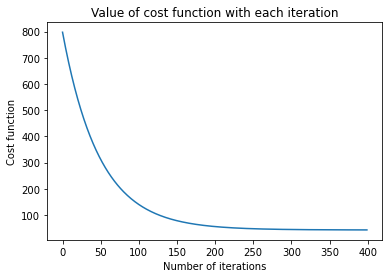

In [14]:
#Visualization
plt.figure()
plt.plot(range(iterations), j_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Value of cost function with each iteration")
plt.show()

##### With each iteration, the value of cost function is gradually decreasing which is what we want.

In [15]:
# Calcuate prediction
data = [32, 84, 10]
data_norm= (data - mean)/std
data_norm1 = np.r_[1, data_norm]
reg.prediction(data_norm1, thetas)

47.05963797295517